<a href="https://colab.research.google.com/github/sanil72900/COGS118B_Final/blob/main/Cogs118BSocialGroups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
import sklearn.cluster as cluster
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn import mixture
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Exploratory Data Analysis

In [ ]:
data = pd.read_csv('/content/drive/Shareddrives/Cogs 118B Project/Data/wine.data', header = None)
data.columns = ['Class_Identifier', 'Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids', 
                'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280/OD315', 'Proline']

In [ ]:
data

,Class_Identifier,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class_Identifier      178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_Acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Ash_Alcanity          178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_Phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_Phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_Intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280/OD315           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


The dataset contains no null values, so no further pre-processing is required. 


## Descriptive Statistics

We observe the column 'Class_Identifier', which forms the "label" for the different classes in the data. 

In other words, we have 3 classes in this dataset. 

Our goal is to replicate these class assignments through cluster assignments by implementing K-means and Mixture of Gaussians. 



There are 59 data points in class 1, 71 data points in class 2 and 48 points in class 3. 




In [ ]:
data['Class_Identifier'].value_counts()

2    71
1    59
3    48
Name: Class_Identifier, dtype: int64

Let's look the distribution and some initial statistics of the data. 




In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Class_Identifier,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


Data Visualization : Distribution of each feature within the dataset.

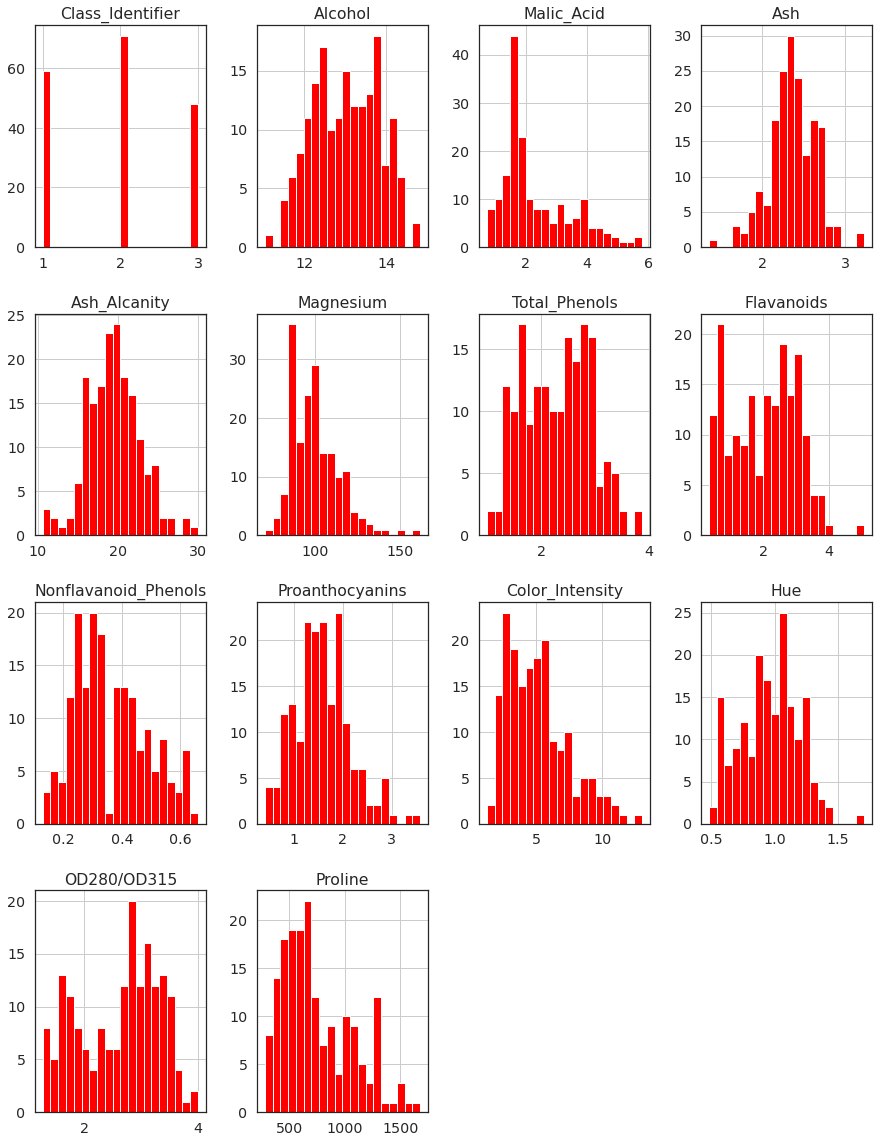

In [ ]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(15,20)})
ax=data.hist(bins=20,color='red')

Let's analyze the distribution of the points assigned to class 1. 

In [ ]:
data[data['Class_Identifier'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
Class_Identifier,59.0,1.000000,0.000000,1.00,1.000,1.00,1.000,1.00
Alcohol,59.0,13.744746,0.462125,12.85,13.400,13.75,14.100,14.83
Malic_Acid,59.0,2.010678,0.688549,1.35,1.665,1.77,1.935,4.04
Ash,59.0,2.455593,0.227166,2.04,2.295,2.44,2.615,3.22
Ash_Alcanity,59.0,17.037288,2.546322,11.20,16.000,16.80,18.700,25.00
Magnesium,59.0,106.338983,10.498949,89.00,98.000,104.00,114.000,132.00
Total_Phenols,59.0,2.840169,0.338961,2.20,2.600,2.80,3.000,3.88
Flavanoids,59.0,2.982373,0.397494,2.19,2.680,2.98,3.245,3.93
Nonflavanoid_Phenols,59.0,0.290000,0.070049,0.17,0.255,0.29,0.320,0.50
Proanthocyanins,59.0,1.899322,0.412109,1.25,1.640,1.87,2.090,2.96


Data Visualization : Distribution of each feature for the data points assigned to class 1. 

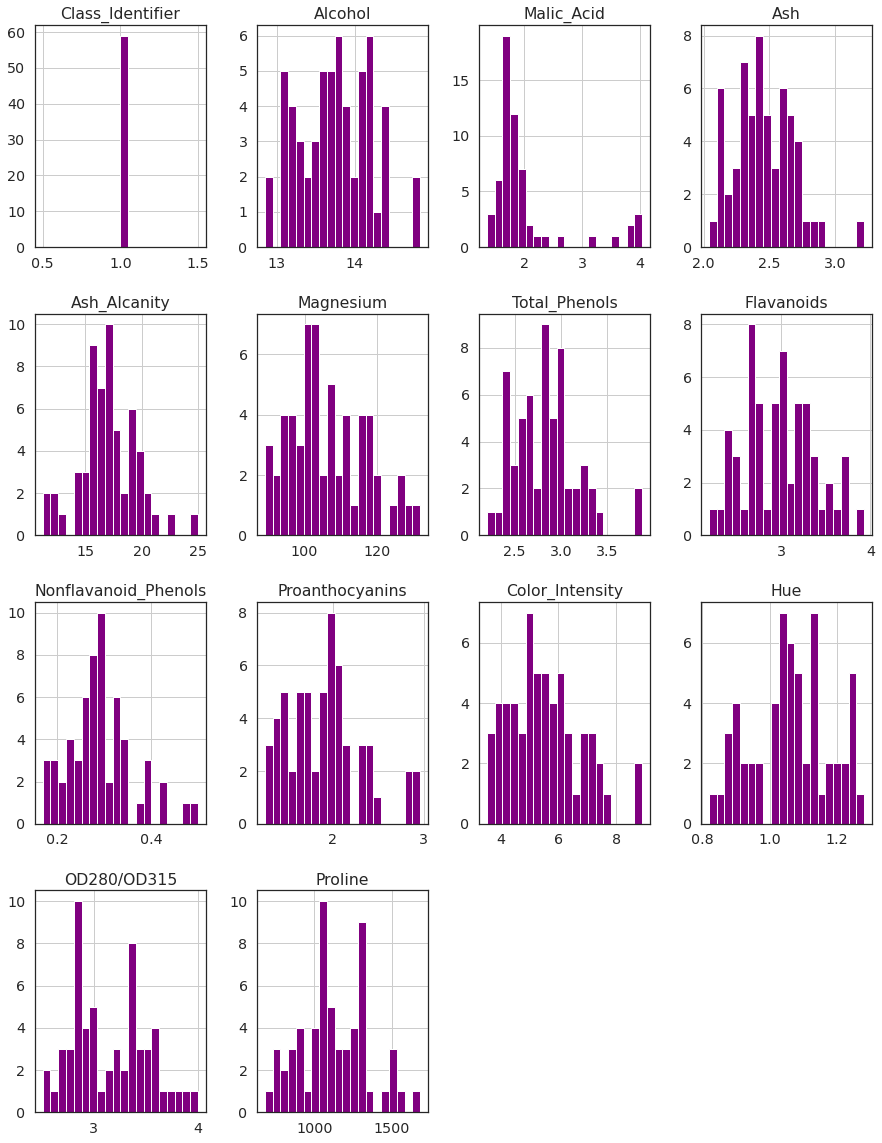

In [ ]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(15,20)})
ax=data[data['Class_Identifier'] == 1].hist(bins=20,color='purple')

Let's analyze the distribution of the points assigned to class 2. 

In [ ]:
data[data['Class_Identifier'] == 2].describe().T

,count,mean,std,min,25%,50%,75%,max
Class_Identifier,71.0,2.000000,0.000000,2.00,2.000,2.00,2.000,2.00
Alcohol,71.0,12.278732,0.537964,11.03,11.915,12.29,12.515,13.86
Malic_Acid,71.0,1.932676,1.015569,0.74,1.270,1.61,2.145,5.80
Ash,71.0,2.244789,0.315467,1.36,2.000,2.24,2.420,3.23
Ash_Alcanity,71.0,20.238028,3.349770,10.60,18.000,20.00,22.000,30.00
Magnesium,71.0,94.549296,16.753497,70.00,85.500,88.00,99.500,162.00
Total_Phenols,71.0,2.258873,0.545361,1.10,1.895,2.20,2.560,3.52
Flavanoids,71.0,2.080845,0.705701,0.57,1.605,2.03,2.475,5.08
Nonflavanoid_Phenols,71.0,0.363662,0.123961,0.13,0.270,0.37,0.430,0.66
Proanthocyanins,71.0,1.630282,0.602068,0.41,1.350,1.61,1.885,3.58


Data Visualization : Distribution of each feature for the data points assigned to class 2.

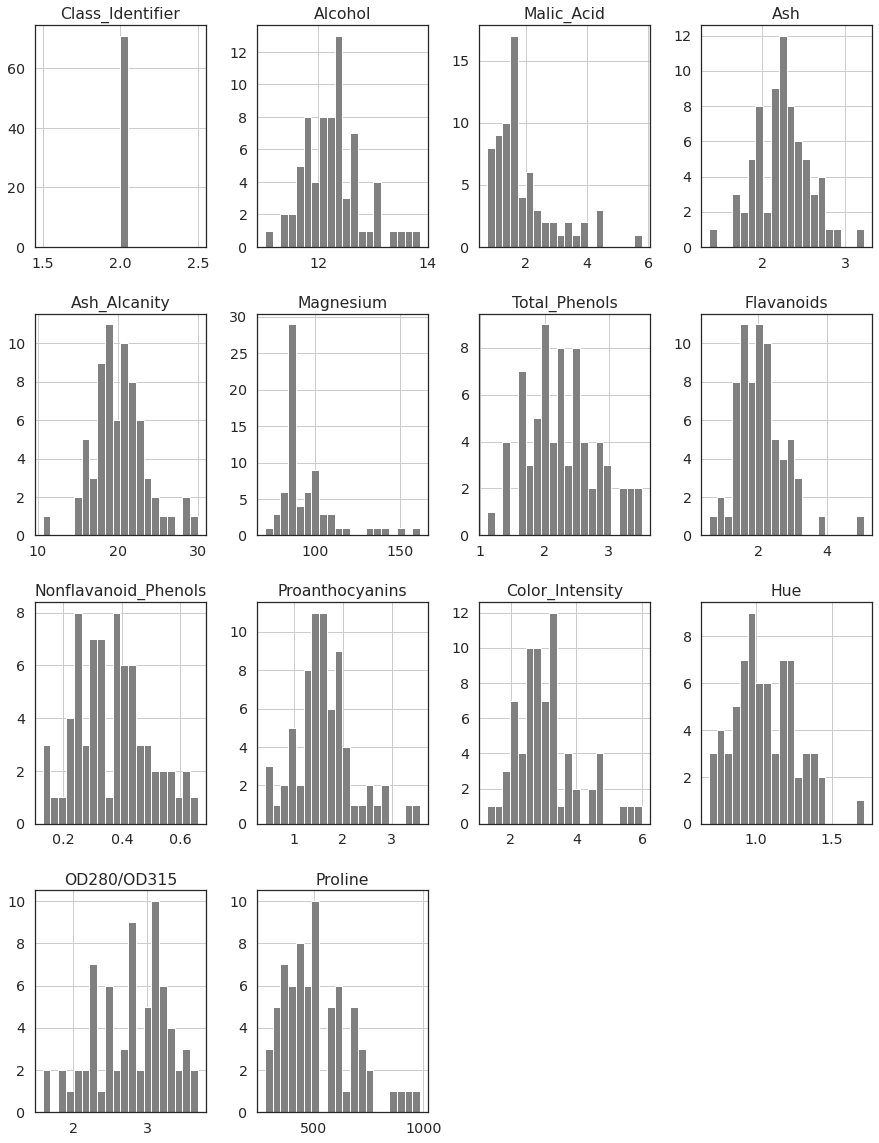

In [ ]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(15,20)})
ax=data[data['Class_Identifier'] == 2].hist(bins=20,color='gray')

Let's analyze the distribution of points in class 3. 

In [ ]:
data[data['Class_Identifier'] == 3].describe().T

,count,mean,std,min,25%,50%,75%,max
Class_Identifier,48.0,3.000000,0.000000,3.00,3.0000,3.000,3.0000,3.00
Alcohol,48.0,13.153750,0.530241,12.20,12.8050,13.165,13.5050,14.34
Malic_Acid,48.0,3.333750,1.087906,1.24,2.5875,3.265,3.9575,5.65
Ash,48.0,2.437083,0.184690,2.10,2.3000,2.380,2.6025,2.86
Ash_Alcanity,48.0,21.416667,2.258161,17.50,20.0000,21.000,23.0000,27.00
Magnesium,48.0,99.312500,10.890473,80.00,89.7500,97.000,106.0000,123.00
Total_Phenols,48.0,1.678750,0.356971,0.98,1.4075,1.635,1.8075,2.80
Flavanoids,48.0,0.781458,0.293504,0.34,0.5800,0.685,0.9200,1.57
Nonflavanoid_Phenols,48.0,0.447500,0.124140,0.17,0.3975,0.470,0.5300,0.63
Proanthocyanins,48.0,1.153542,0.408836,0.55,0.8550,1.105,1.3500,2.70


Data Visualization : Distribution of each feature for the data points assigned to class 3.

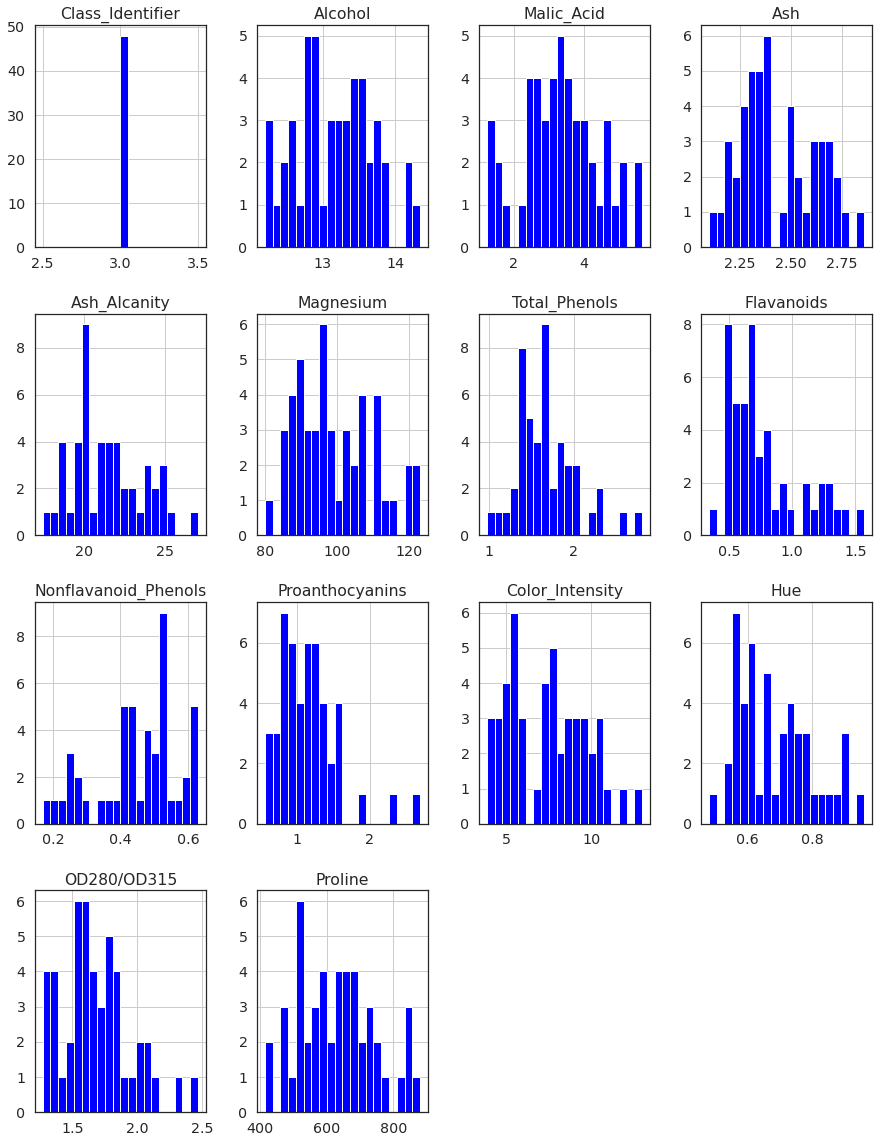

In [ ]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(15,20)})
ax=data[data['Class_Identifier'] == 3].hist(bins=20,color='blue')

As we observe from the plots of the three classes, each feature looks normally distributed. Thus, we can use K-means and Mixture of Gaussians to separate each of the points into different clusters. 

## Data Visualization using Correlation Matrix

We also analyze a heatmap of all the features to examine the correlation between each feature of the dataset. 

Looking at the features, we observe that Flavanoids and total_Phenols have a higher correlation (0.86). 

The other features are relatively negatively correlated, but most lie outside the range [-0.5, 0.5], so few features are highly correlated. 


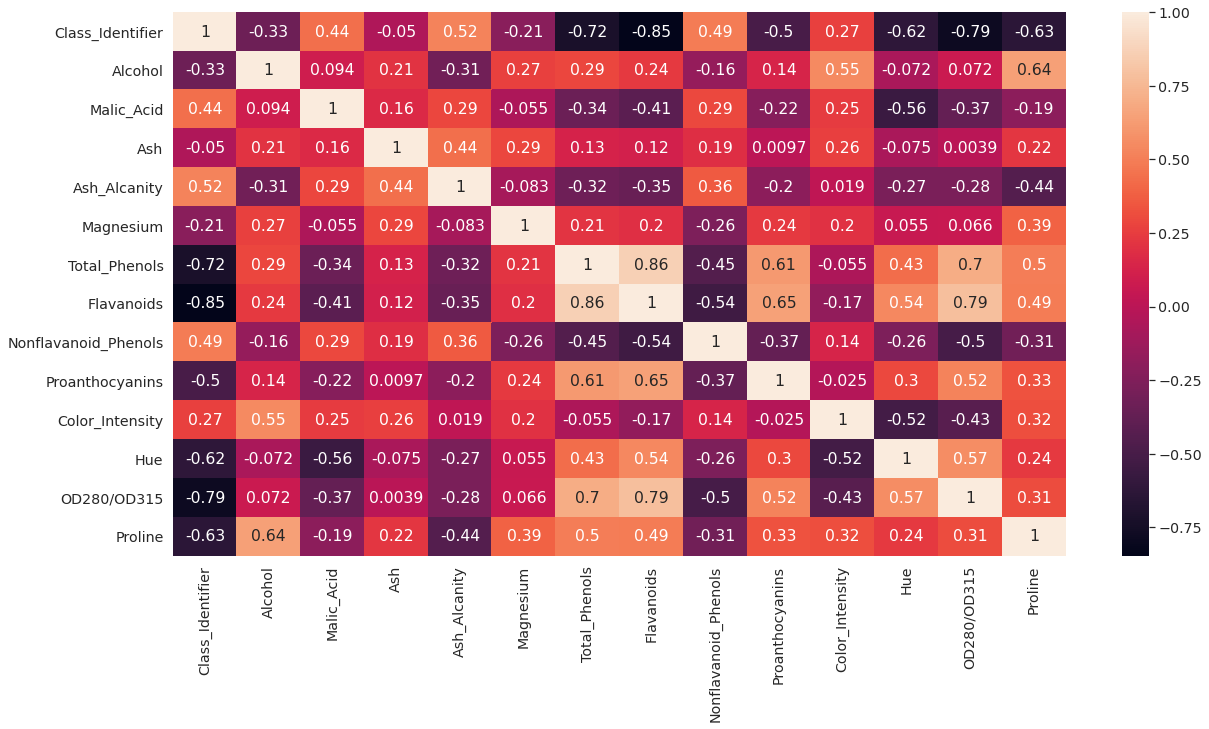

In [ ]:
plt.figure(figsize= (20, 10))
sns.heatmap(data.corr(), color = 'k', annot = True)


### Scaling the data

We scale the data so that the range of features are normalized. 

This would prevent any outliers or highly variable data points from skewing the results. 

In [ ]:
st_scale = StandardScaler()
st_data=data.copy()
st_data[st_data.columns]=st_scale.fit_transform(st_data)

st_data.head()

,Class_Identifier,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280/OD315,Proline
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


## Finding Optimal Number of Clusters for K-Means and MOG


We used the elbow method and analyzed the optimal number of clusters based on two metrics inertia and distortion. 


The elbow method runs K-means clustering on the scaled data for a range of values of k, and then computes an average score for all clusters for each value of k. 

We then plot the cluster score and find the value at which the inertia/distortion starts decreasing (elbow point). This value of k is our optimal number of clusters.


Here, inertia refers to the sum of squared distances of the data points to their closest cluster center.

Distortion refers to the average of the squared distances of each data point from the cluster centers of the respective clusters, based on Euclidean distance. 

In [ ]:
inertia = []
distortion = []
for k in range(2,10):
    kmeanModel = cluster.KMeans(n_clusters=k,random_state=17)
    kmeanModel.fit(st_data)
    distortion.append(sum(np.min(cdist(st_data, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / st_data.shape[0])
    inertia.append(kmeanModel.inertia_)

Comparison of intertia and distortion values for each k value from 2 to 10. 

In [ ]:
elbow_analysis = pd.DataFrame(list(zip(inertia, distortion)), columns = ['Inertia', 'Distortion'], index = range(2, 10))
print(elbow_analysis)

       Inertia  Distortion
2  1727.228661    2.995776
3  1285.562259    2.537535
4  1184.790943    2.456778
5  1118.420283    2.395432
6  1060.003097    2.330682
7   991.307083    2.259868
8   952.871743    2.210129
9   915.795211    2.172154


### The Elbow Method using Inertia



In [ ]:
pip install kneed

Locating knee value for curve using inertia.

In [ ]:
from kneed import KneeLocator
kn = KneeLocator(range(2, 10), inertia, curve='convex', direction='decreasing')
print("Knee value of curve using Inertia values: ", kn.knee)


Knee value of curve using Inertia values:  3


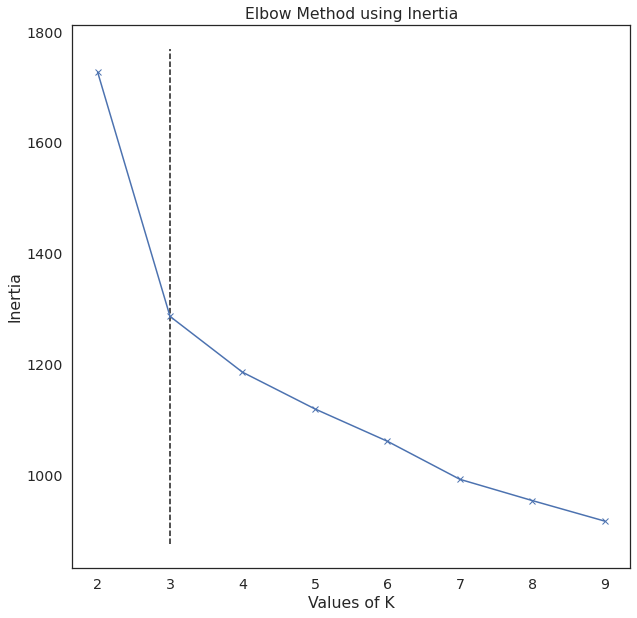

In [ ]:
plt.figure(figsize= (10, 10))
plt.plot(range(2, 10), inertia, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Elbow Method using Inertia')
plt.show()

### The Elbow Method using Distortion

Locating knee value for curve using distortion.

In [ ]:
from kneed import KneeLocator
kn = KneeLocator(range(2, 10), distortion, curve='convex', direction='decreasing')
print("Knee value of curve using Distortion values: ", kn.knee)


Knee value of curve using Distortion values:  3


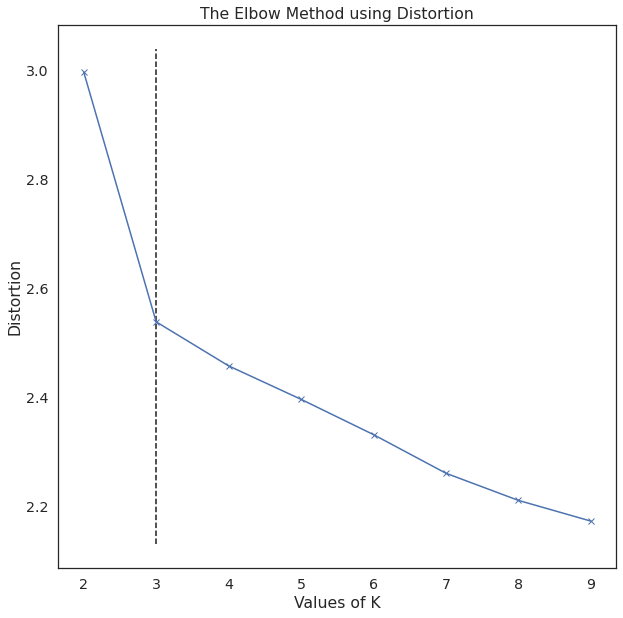

In [ ]:
plt.figure(figsize= (10, 10))
plt.plot(range(2, 10), distortion, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

### From the above graphs, we observe that the elbow occurs at k = 3. 

### Thus, the optimal number of clusters is 3. 

### Silhoutte Co-efficient Algorithm

 We also checked for the optimal number of clusters using the Silhouette Co-efficient Algorithm. 

In [ ]:
sil = []

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, 10):
  kmeanModel = KMeans(n_clusters = k)
  kmeanModel.fit(st_data)
  labels = kmeanModel.labels_
  sil.append(silhouette_score(st_data, labels, metric = 'euclidean'))

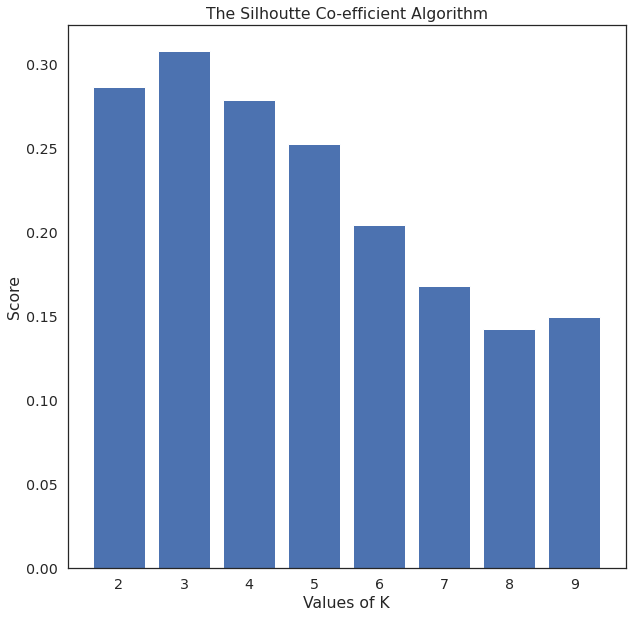

In [ ]:

plt.figure(figsize= (10, 10))
plt.bar(range(2, 10), sil,)
plt.xlabel('Values of K')
plt.ylabel('Score')
plt.title('The Silhoutte Co-efficient Algorithm')
plt.show()

### From the bar graph, we observe that the maximum value of the silhouette co-efficient is 3, so the optimal number of clusters is 3. 

# Principal Component Analysis

Our data contains 14 features, so visualizing these features would be difficult. We decided to use PCA to reduce the dimensionality of data, and perform K-means clustering and Mixture of Gaussians on the two principal components with the most variance. 

In [ ]:
#Load the data
pca = PCA(2)

#Transform the data
df = pca.fit_transform(st_data)
principalDf = pd.DataFrame(data = df, columns = ['PC 1', 'PC 2'])
principalDf

,PC 1,PC 2
0,-3.522934,-1.453098
1,-2.528858,0.330019
2,-2.785029,-1.036936
3,-3.922588,-2.768210
4,-1.407511,-0.867773
...,...,...
173,3.627996,-2.206617
174,2.942729,-1.752263
175,3.027272,-2.756040
176,2.755222,-2.293784


Plot of the two principal components with the most variance.

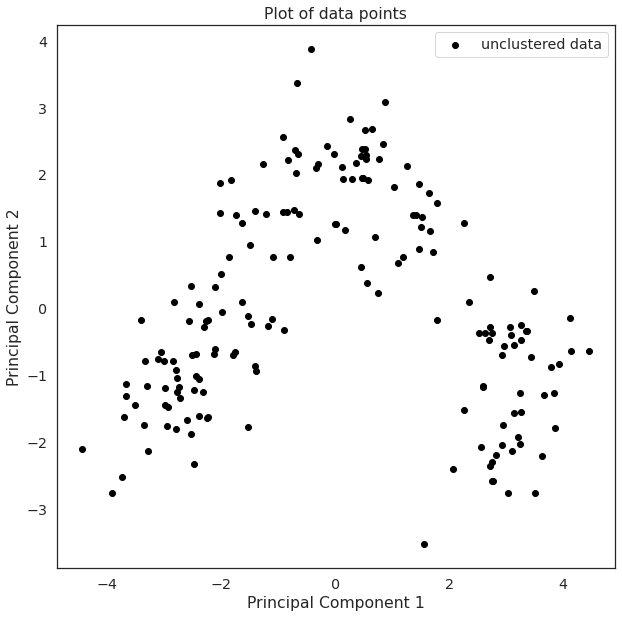

In [ ]:

plt.figure(figsize= (10, 10))
plt.scatter(df[:,0],df[:,1],c='black',label='unclustered data')
plt.legend()
plt.title('Plot of data points')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Implementation of K-means (K = 3)

K-Means plotting function. In each plot, all data points assigned to cluster 1 are colored red, all data points in cluster 2 are colored green and all data points in cluster 3 are colored blue. 

In [ ]:
def plot(X, Rnk, center_means):
    plt.figure(figsize= (10, 10))
    colors=['red','blue','green']
    labels=['cluster1','cluster2','cluster3']
    for k in range(np.shape(Rnk)[1]):
      for n in range(np.shape(Rnk)[0]):
        if (Rnk[n][0] == 1):   
          plt.scatter(X[n][0], X[n][1], c = 'red',alpha=0.3,marker='o')
        if (Rnk[n][1] == 1):
          plt.scatter(X[n][0], X[n][1], c = 'blue',alpha=0.3,marker='o')
        if Rnk[n][2] == 1: 
          plt.scatter(X[n][0], X[n][1], c = 'green',alpha=0.3,marker='o')
      plt.scatter(center_means[0][0],center_means[0][1],s=50,marker='D',c = 'black')
      plt.scatter(center_means[1][0],center_means[1][1],s=50,marker='D',c = 'black')
      plt.scatter(center_means[2][0],center_means[2][1],s=50,marker='D',c = 'black')

calc_square_distances() calculates the square of the euclidean distance between each data point and cluster mean.

In [ ]:
def calc_square_distances(X, center_means):

    square_distances = np.zeros( (len(X), len(center_means)) )

    for i in range(len(X)):
       square_distances[i] = (np.linalg.norm(X[i] - center_means, axis = 1)) ** 2
    return square_distances
    

update_identities() updates the identity of each data point, i.e. assigns data points to clusters based on minumum squared Euclidean distance to cluster mean. 

In [ ]:
def update_identities(square_distances):

    identity_matrix = np.zeros_like(square_distances)
    
    for row in range(square_distances.shape[0]):
        identity_matrix[row][np.argmin(square_distances[row, :], axis = 0)] = 1
   
    return identity_matrix
    

update_cluster_means() is called at each iteration to re-compute cluster means based on average of data points assigned to that cluster.  

In [ ]:
def update_center_means(X, identity_matrix):
    new_identity_matrix = [X.T.dot(identity_matrix[:, i])/sum(identity_matrix[:, i])  for i in range(identity_matrix.shape[1]) ]
  
    return np.array(new_identity_matrix)

Run the K-means algorithm calling the functions described above. 

In [ ]:
def KMeans(K, X):
    center_means = np.zeros((K, np.shape(X)[1]))
    indices = np.random.permutation(np.shape(X)[0])

    # Randomly initialize cluter means
    center_means = X[indices[:K]]
    for iter in range(1000):
        square_distances = calc_square_distances(X, center_means)
        identity_matrix = update_identities(square_distances)
        center_meansOld = center_means
        plot(X,identity_matrix, center_means)
        plt.show()
        center_means = update_center_means(X, identity_matrix)
        if sum(abs(center_meansOld.flatten() - center_means.flatten())) < 1e-6:
            return identity_matrix
            break

    plot(X,identity_matrix,center_means)

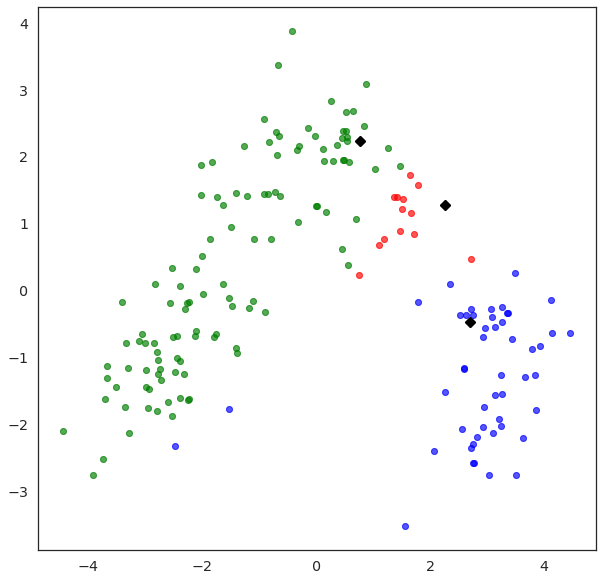

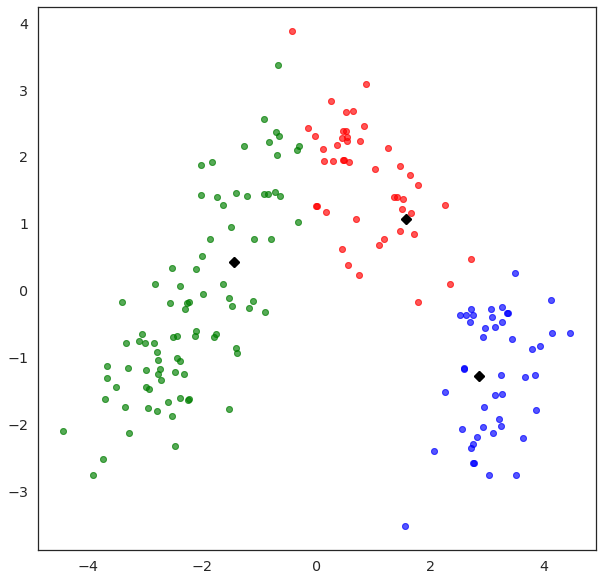

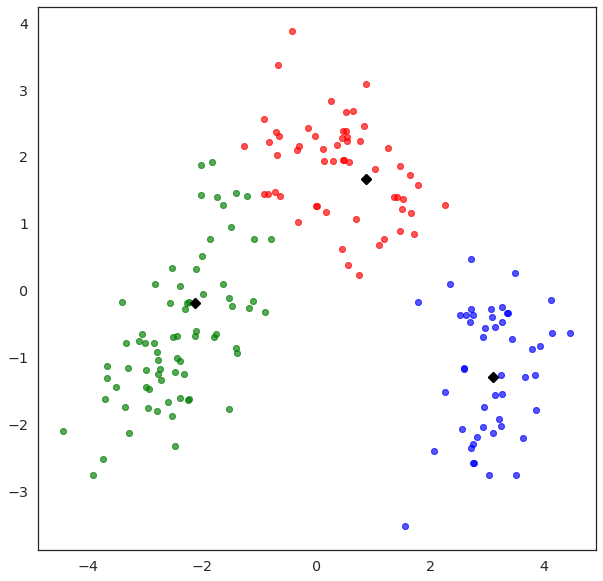

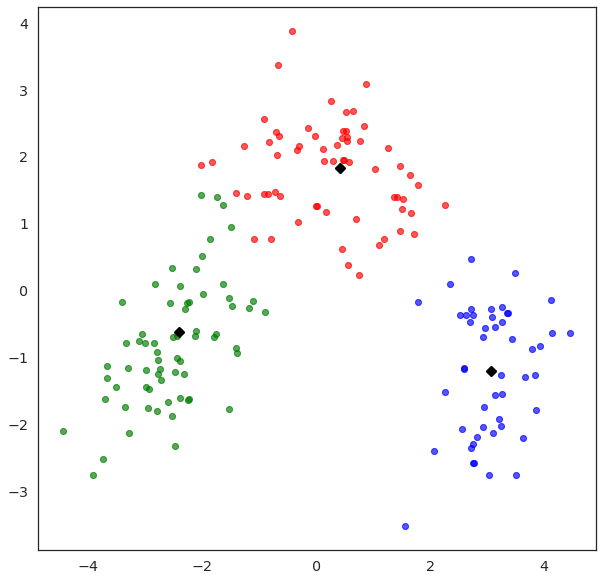

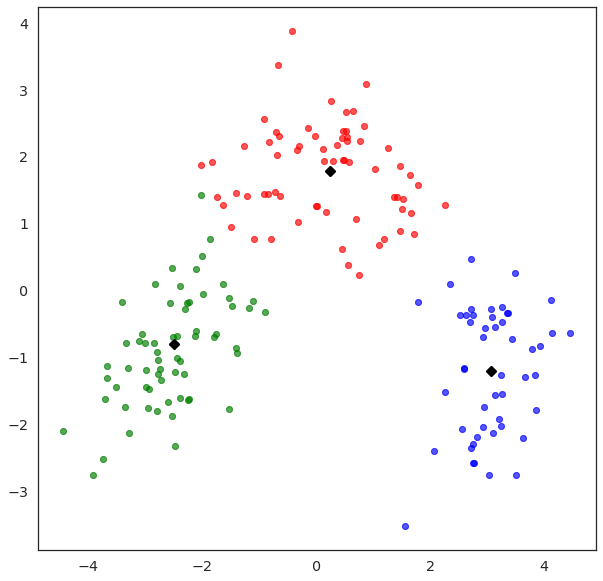

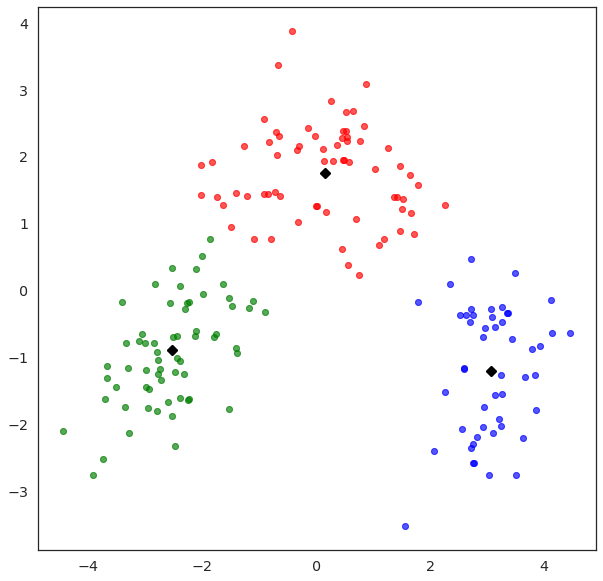

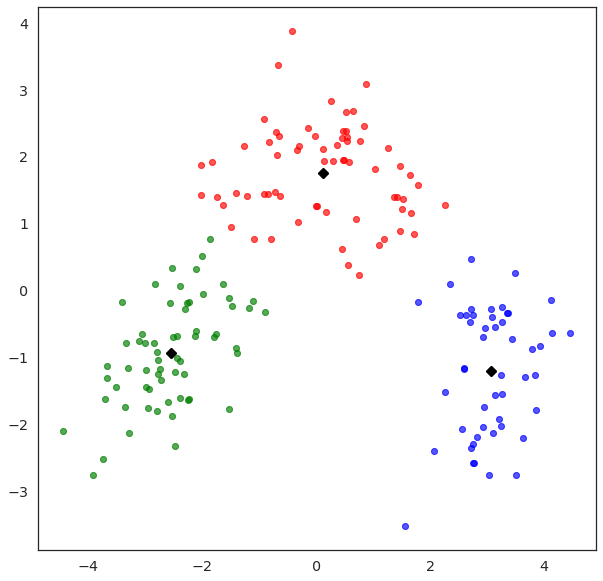

In [ ]:
results = KMeans(3, df)

As we can see from the plots above, K-means is able to effectively cluster the data points into three different clusters.

The following function simulate_KMeans() calculates the average error of the K-Means algorithm. 

In [ ]:
def simulate_KMeans():
      k_run = KMeans(3, df)
      one_class = np.where(k_run[:60] == 1)[1]
      two_class = np.where(k_run[61:130] == 1)[1]
      three_class = np.where(k_run[130:] == 1)[1]
      total_error = 0
      for a_class in [one_class, two_class, three_class]:
        assigned = stats.mode(a_class)[0]
        for i in a_class:
          if assigned[0] != i:
            total_error += 1
      avg_err = total_error/len(labels)
      return avg_err

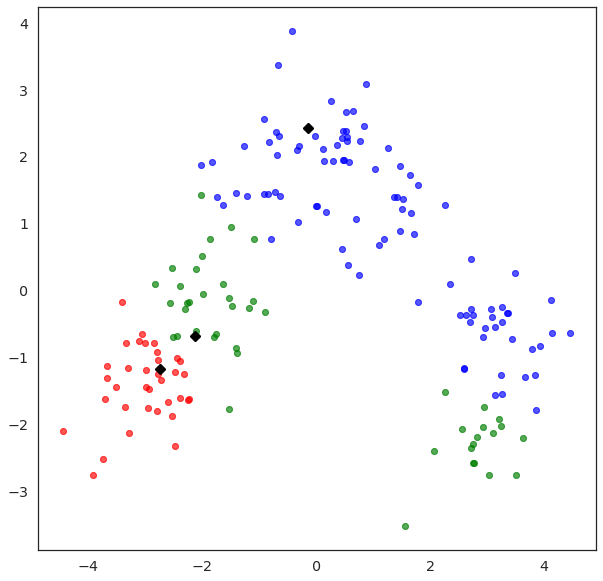

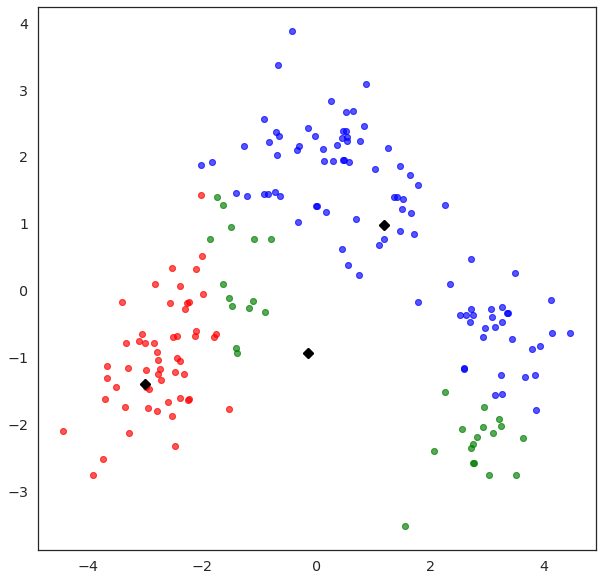

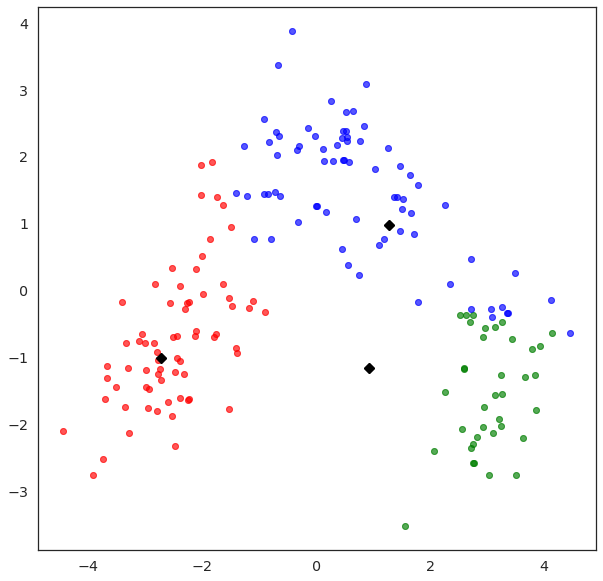

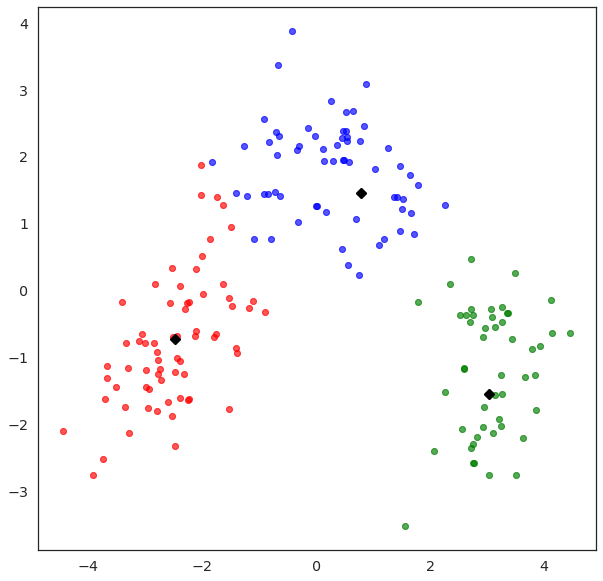

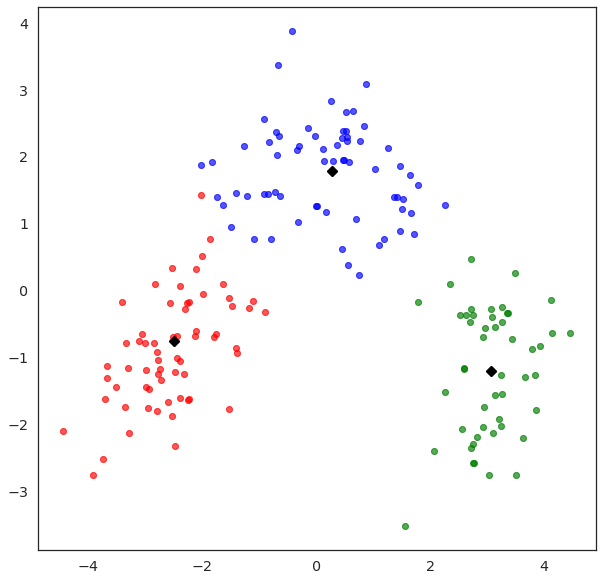

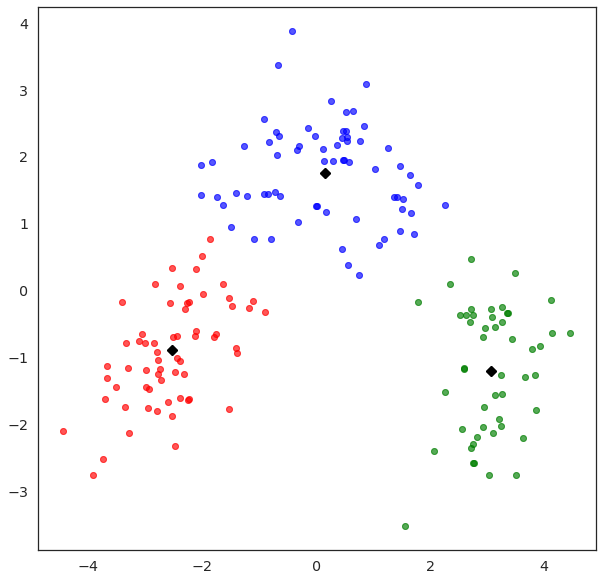

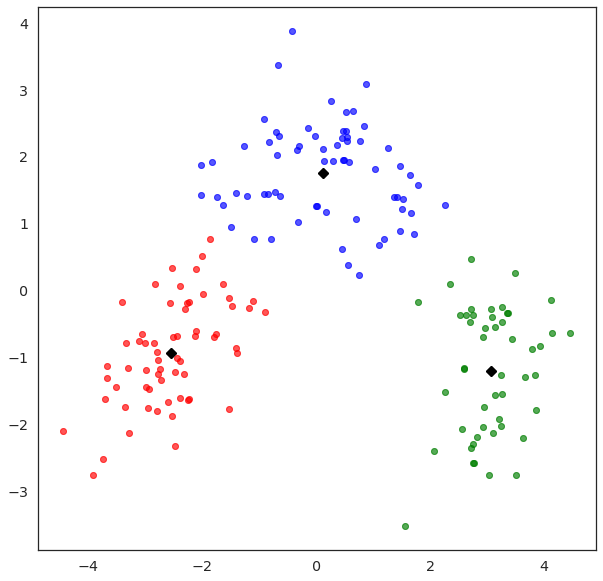

In [ ]:
err_kmeans = simulate_KMeans()
acc_kmeans = 1 - err_kmeans

In [ ]:
print('Average Error of K-Means:',err_kmeans)
print('Average Accuracy of K-Means:', acc_kmeans)


Average Error of K-Means: 0.028089887640449437
Average Accuracy of K-Means: 0.9719101123595506


As seen above, the K-Means algorithm is ~97.19% accurate in clustering the data points into 3 different clusters. 


We then implement a Mixture of Gaussians Model to compare and contrast the clustering, average error and average accuracy.

## Implementation of Gaussian Mixture Models

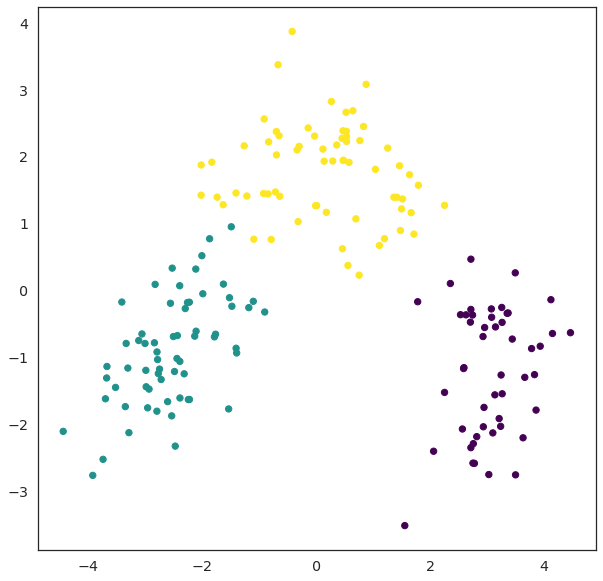

In [ ]:
model = mixture.GaussianMixture(n_components=3, covariance_type='full').fit(df)
mix_labels = model.predict(df)
plt.figure(figsize= (10, 10))
plt.scatter(df[:, 0], df[:, 1], c=mix_labels, s=40, cmap='viridis')

We then use the predict_proba method to find probabilitic cluster assignments. To visualize this, we make the size of each point proportional to the certainty of prediction. 

Text(0, 0.5, 'PCA Variable 2')

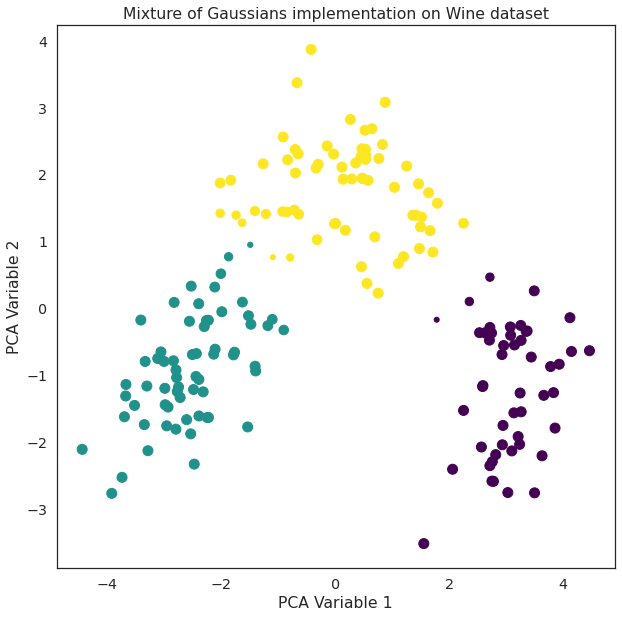

In [ ]:
prob_point = model.predict_proba(df)


plt.figure(figsize= (10, 10))
# To clearly visualize differenes 
size = 100 * prob_point.max(1) ** 2 
plt.scatter(df[:, 0], df[:, 1], c=mix_labels, cmap='viridis', s=size)
plt.title('Mixture of Gaussians implementation on Wine dataset') 
plt.xlabel('PCA Variable 1')
plt.ylabel('PCA Variable 2')

From the above figure, we can see that the points at the boundaries of the clusters are smaller in comparison with the size of the points at the centers of the clusters. This small size reflects the uncertainty of points-to-cluster assignment. We are more certain that the larger points belong to that particular cluster. 

As done for K-Means, The following function simulate_mix() calculates the average error of the Mixture of Gaussians algorithm. 

In [ ]:
def simulate_mix():
  model = mixture.GaussianMixture(n_components=3, covariance_type='full').fit(df)
  mix_labels = model.predict(df)
  labels = np.array(data['Class_Identifier'])
  lab_dict = {}
  for lab in np.unique(labels):
    lab_dict[lab] = []
  for idx, label in enumerate(labels):
    lab_dict[label].append(idx)
  one_class = mix_labels[:60]
  two_class = mix_labels[61:130]
  three_class = mix_labels[130:]
  total_error = 0
  for a_class in [one_class, two_class, three_class]:
    assigned = stats.mode(a_class)[0]
    for i in a_class:
      if assigned[0] != i:
        total_error += 1
  avg_err = total_error/len(labels)
  return avg_err

In [ ]:
err_mix = simulate_mix()
acc_mix = 1 - err_mix

print('Average Error of Mixture of Gaussians:',err_mix)
print('Average Accuracy of Mixture of Gaussians:', acc_mix)


Average Error of Mixture of Gaussians: 0.033707865168539325
Average Accuracy of Mixture of Gaussians: 0.9662921348314607


As seen above, the Mixture of Gaussians model is also quite accurate, ~96.63% accurate in clustering the data points into 3 different clusters. 

Since the dataset contained the true labels for each data point, i.e. the Class_Identifier' column, we decided to implement a supervised learning algorithm as well and compare the classification results with our clustering results. 

We implemented K-Nearest Neighbors Algorithm on the dataset. 

## K-Nearest Neighbors Implementation

Text(0, 0.5, 'PCA Variable 2')

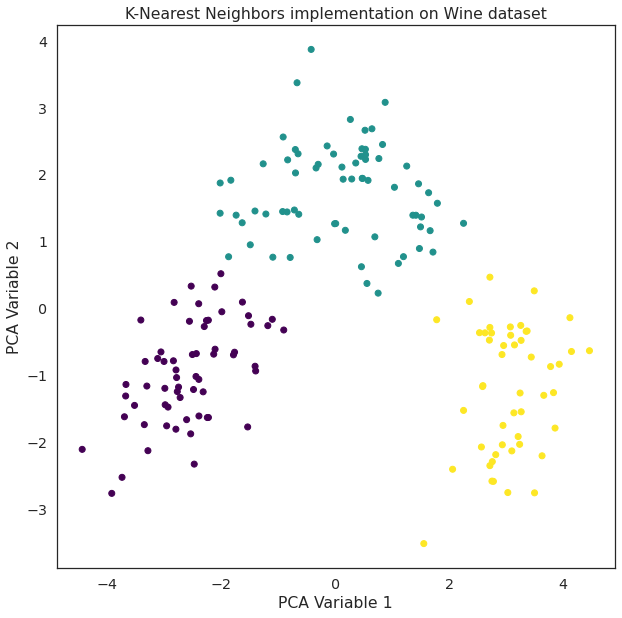

In [ ]:
X = df
y = data['Class_Identifier']


plt.figure(figsize= (10, 10))
X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size = 0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train)
plt.scatter(x= X[:,0], y=X[:,1], c=knn.predict(X), cmap='viridis')
plt.title('K-Nearest Neighbors implementation on Wine dataset') 
plt.xlabel('PCA Variable 1')
plt.ylabel('PCA Variable 2')

As done before, The following function simulate_knn() calculates the average error of the K-Nearest Neighbors algorithm. 

In [ ]:
#Run k-nearest neighbors
def simulate_knn():
  X = st_data.loc[:, st_data.columns != 'Class_Identifier']
  y = data['Class_Identifier']
  #split train and test set
  X_train, X_test, y_train, y_test = train_test_split(
              X, y, test_size = 0.2, random_state=42)
    
  knn = KNeighborsClassifier(n_neighbors=5) 
  knn.fit(X_train, y_train)
  acc_knn = metrics.accuracy_score(y_test, knn.predict(X_test))
  err_knn = 1- acc_knn

  return err_knn

In [ ]:
err_knn = simulate_knn()
acc_knn = 1 - err_knn

print('Average Error of K-Nearest Neighbors:', err_knn)
print('Average Accuracy of K-Nearest Neighbors:', acc_knn)

Average Error of K-Nearest Neighbors: 0.05555555555555558
Average Accuracy of K-Nearest Neighbors: 0.9444444444444444


As seen above, the K-Nearest Neighbors Algorithm is also quite accurate, ~94.45% accurate in classifying the data points into 3 different classes. 

## Statistical Tests and Results

In order to discern whether the results of K-Means, Mixture of Gaussians and K-Nearest Neighbors are statistically significant, we carry out paired t-tests between the average errors returned by each algorithm. 



We simulate K-Means, Mixture of Gaussians and K-Nearest Neighbors 100 times. 

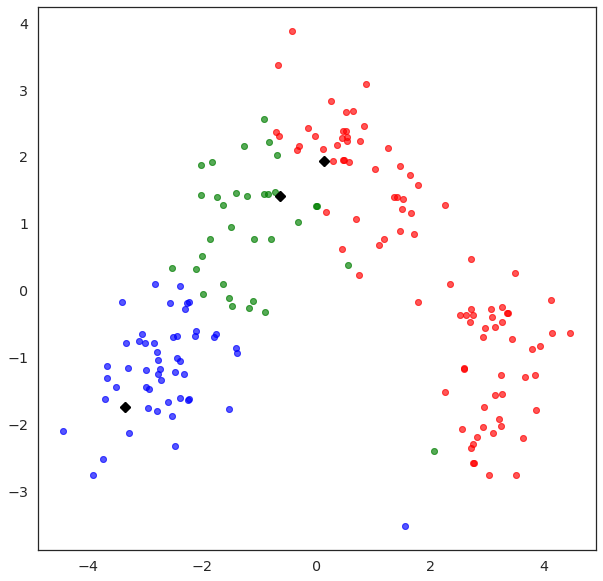

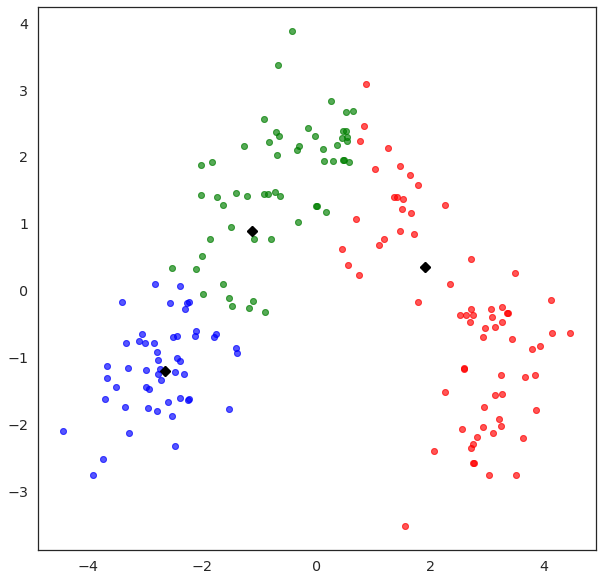

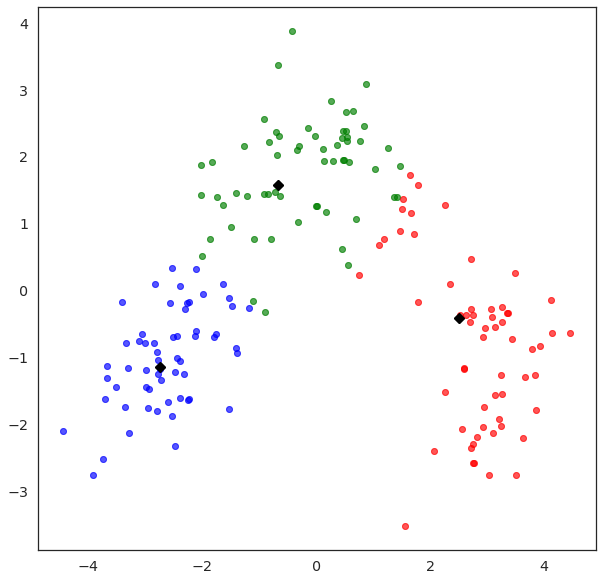

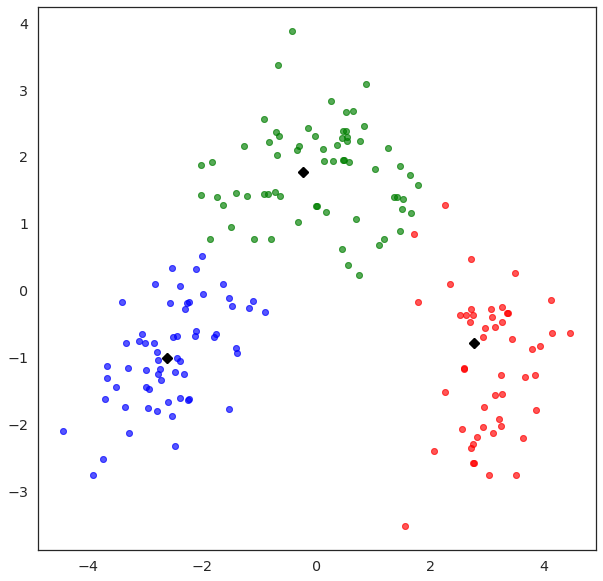

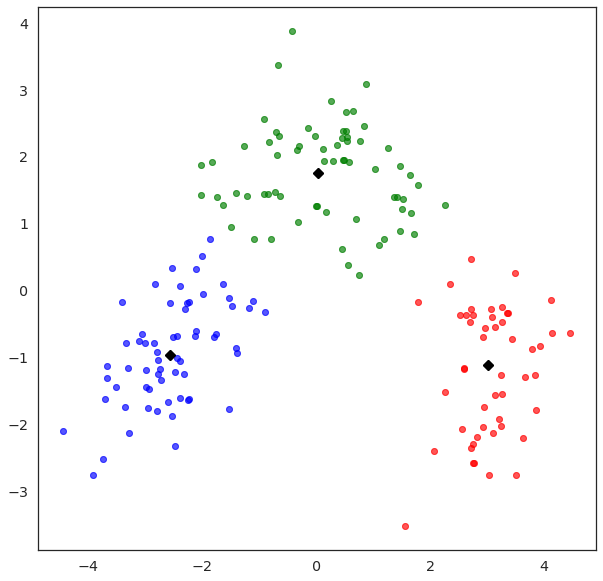

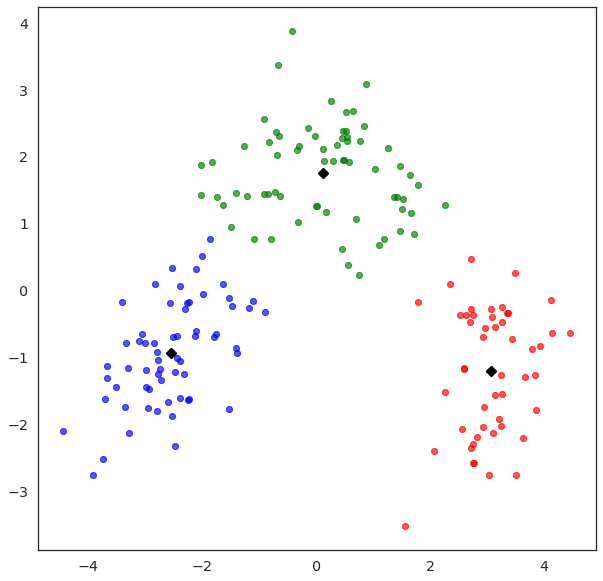

P-values from paired t-test:
K-Means vs Mixture of Gaussians:0.0
Mixture of Gaussians vs K-Nearest Neighbors: 0.0
K-Means vs K-Nearest Neighbors:0.0


In [ ]:

rv1 = np.repeat(simulate_KMeans(), 100)
rv2 = np.repeat(simulate_mix(), 100)
rv3 = np.repeat(simulate_knn(), 100)


We then carry out paired t-tests between each algorithm's average error array and analyse the p-value. 

The p-value is 0.0 in all cases. 


Since the p-value is < 0.05 in all cases, we have strong evidence against the null hypothesis. We reject the null hypothesis, accept the alternative hypothesis and conclude that the results of each algorithm are statistically significant from each other. 

In [ ]:
km_vs_mix = stats.ttest_rel(rv1, rv2)
mix_vs_knn = stats.ttest_rel(rv2, rv3)
km_vs_knn = stats.ttest_rel(rv1, rv3)
message = 'P-values from paired t-test:\nK-Means vs Mixture of Gaussians:'+str(km_vs_mix[1])+'\nMixture of Gaussians vs K-Nearest Neighbors: '+str(mix_vs_knn[1])+'\nK-Means vs K-Nearest Neighbors:'+str(km_vs_knn[1])
print(message)

P-values from paired t-test:
K-Means vs Mixture of Gaussians:0.0
Mixture of Gaussians vs K-Nearest Neighbors: 0.0
K-Means vs K-Nearest Neighbors:0.0


### Summary Results Table

In [ ]:
errs =[err_kmeans, err_mix, err_knn]
n_vals = len(labels)
results_df = pd.DataFrame(np.rint(np.array(errs)*n_vals), columns=['Total Misclassified Points'])
results_df.index = ['K-Means', 'Mixture of Gaussians','K Nearest Neighbors']
results_df['Average Error'] = errs
results_df['Accuracy'] = [acc_kmeans, acc_mix, acc_knn]
results_df['Statistically significant'] = ['Yes','Yes','Yes']

results_df

,Total Misclassified Points,Average Error,Accuracy,Statistically significant
K-Means,5.0,0.028090,0.971910,Yes
Mixture of Gaussians,6.0,0.033708,0.966292,Yes
K Nearest Neighbors,10.0,0.055556,0.944444,Yes


The following grouped bar plot shows the distribution of points assigned to each cluster by each algorithm, as well as the true number of points within each cluster. 

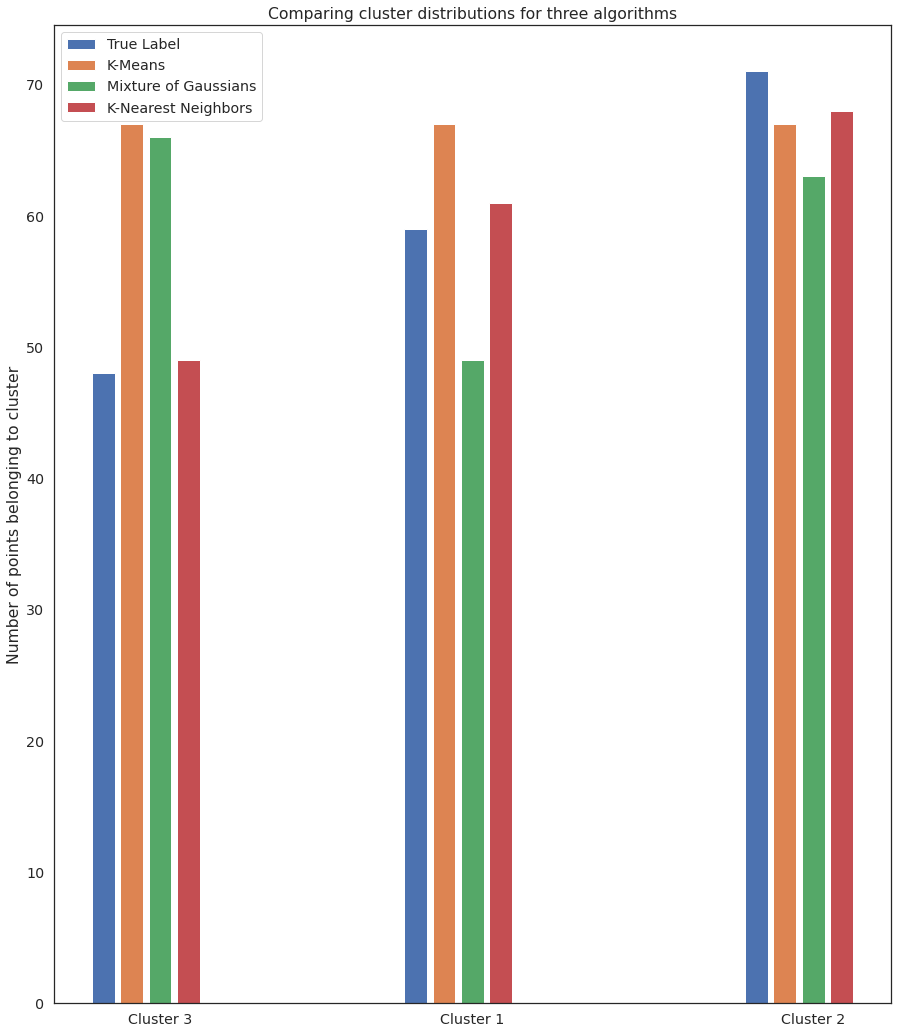

In [ ]:
labels = np.array(['Cluster 1', 'Cluster 2', 'Cluster 3'])
true = data['Class_Identifier'].value_counts()
true_labels = np.array([true[1], true[2], true[3]])
kmean_class = np.where(results == 1)[1]

pred_kmeans = [np.count_nonzero(kmean_class == 0), np.count_nonzero(kmean_class == 0), np.count_nonzero(kmean_class == 0)]
mix_labels = model.predict(df) 
pred_mix = [np.count_nonzero(mix_labels == 0), np.count_nonzero(mix_labels == 1), np.count_nonzero(mix_labels == 2)]
knn_labels = knn.predict(X)
pred_knn = [np.count_nonzero(knn_labels == 1), np.count_nonzero(knn_labels == 2), np.count_nonzero(knn_labels == 3)]
width = 0.35       

fig, ax = plt.subplots(figsize=(15, 18))
ax.bar(true_labels - 2, true_labels, label = 'True Label')
ax.bar(true_labels - 1, pred_kmeans, label='K-Means')
ax.bar(true_labels, pred_mix, label='Mixture of Gaussians')
ax.bar(true_labels + 1, pred_knn, label = 'K-Nearest Neighbors')
plt.xticks(true_labels, labels)

ax.legend()
plt.title('Comparing cluster distributions for three algorithms')
plt.ylabel('Number of points belonging to cluster')
plt.show()

## Conclusion


Through this project we aimed to replicate the class assignments for the wines in this dataset through different clustering algorithms namely K-Means and Mixture of Gaussians. We also compared these clustering results with a K-Nearest Neighbor classifier to see if there were any differences. 

Our results showed that K-Means was the most effective algorithm for this particular dataset, as it had the least number of misclassified points (5), and the highest accuracy (97.1%). 
Although Mixture of Gaussians had one more misclassified point than K-Means, further t-tests revealed that these scores were statistically significant from each other. 

K-Nearest Neighbors suprisingly performed the worst out of the three, as it misclassified 10 points and the lowest accuracy (94.45%). This is surprising as we assumed it would perform the best given that it had the true label information. 

Overall, all three algorithms performed quite well on this dataset, as all accuracy values were within [90, 100], and yielded statistically significant results. 
